## Load Into DataFrame

In [169]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import scipy.cluster.hierarchy as sch
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Set name of file
filename = '../data/interim/summaries.csv'

# Read to DataFrame
df = pd.read_csv(filename, sep=',', header=[0], error_bad_lines=False)
df.head()

,Id,Accession,title,summary,taxon
0,200112120,GSE112120,Risk SNPs mediated promoter-enhancer switching...,To determine the binding of H3K4me1 and H3K4me...,Homo sapiens
1,200117735,GSE117735,The ATPase module of mammalian SWI/SNF family ...,This SuperSeries is composed of the SubSeries ...,Homo sapiens
2,200117734,GSE117734,The mSWI/SNF ATPase module mediates subcomplex...,Perturbations to mammalian SWI/SNF (mSWI/SNF) ...,Homo sapiens
3,200128119,GSE128119,COX-2 mediates tumor-stromal Prolactin signali...,Tumor-stromal communication within the microen...,Homo sapiens
4,200126367,GSE126367,Copy number analysis of selumetinib-resistant ...,Copy number analysis to compare parental color...,Homo sapiens


In [3]:
%%time
# Set name of file
filename = '../data/interim/records.pkl'
#filename = '../data/interim/samples.pkl'


# Read to DataFrame
df = pd.read_pickle(filename)
df.head()

CPU times: user 21 s, sys: 9.82 s, total: 30.8 s
Wall time: 32.7 s


# Get the Data

In [94]:
messages = pd.DataFrame(df['summary'].iloc[:1000])
messages['length'] = messages['summary'].apply(len)
messages.head()

,summary,length
0,This series represents a group of cutaneous ma...,218
1,We investigated the changes in gene expression...,1289
2,Human retinal and RPE SAGE libraries. Profile ...,217
3,This series represents the Cancer Genome Anato...,870
4,This series represents the data set from the p...,5727


# Exploratory Data Analysis

In [95]:
messages.describe()

,length
count,1000.000000
mean,718.154000
std,862.788214
min,27.000000
25%,145.750000
50%,360.500000
75%,1076.000000
max,7967.000000


In [96]:
print('Shortest Message:---\n',messages[messages['length'] == int(messages.describe().min())]['summary'].iloc[0])
print('\n')
print('Longest  Message:---\n',messages[messages['length'] == int(messages.describe().max())]['summary'].iloc[0])

Shortest Message:---
 Lung tumors Keywords: other


Longest  Message:---
 The total RNA from control and POAG optic nerve lamina cribrosa region was isolated and subjected to analysis on U133A 2.0 affymetrix microarray chip. The results from these two analysis was compared to determine whether PAD II RNA level is altered. Purpose of the study. This study was done to determine which RNA transcripts undergo significant changes in the optic nerve between normal and cadaver primary open-angle glaucoma donors. Using donor tissues from NDRI we have performed proteomic analyses (which will be published shortly), we intend a comparison between the proteomic and RNA changes for select proteins in our study. Sample Collection and Preparation of Labeled Copy RNA The total RNA from optic nerve was obtained using TRIZOL (Invitrogen Inc., Carlsbad, CA) with modification of recommended protocols. The optic nerve from donor eyes were carefully excised and minced into small pieces first using a scissor

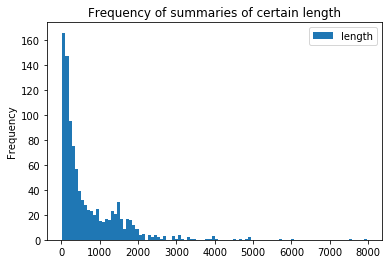

In [97]:
messages.groupby('length').count()
messages['length'].plot(bins=100, kind='hist', title='Frequency of summaries of certain length', legend=True) 

# Text Pre-Processing

In [98]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [99]:
messages['summary'].head(5).apply(text_process)

0    [series, represents, group, cutaneous, maligna...
1    [investigated, changes, gene, expression, acco...
2    [Human, retinal, RPE, SAGE, libraries, Profile...
3    [series, represents, Cancer, Genome, Anatomy, ...
4    [series, represents, data, set, paper, uAssemb...
Name: summary, dtype: object

# Stemming (?)

# Vectorization

In [100]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['summary'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

12595


In [101]:
message2 = messages['summary'][1]
bow2 = bow_transformer.transform([message2])
print(bow2)
print()
print(bow2.shape)

  (0, 263)	1
  (0, 530)	1
  (0, 575)	1
  (0, 786)	1
  (0, 1629)	1
  (0, 1879)	1
  (0, 1987)	1
  (0, 2180)	1
  (0, 2316)	1
  (0, 3402)	2
  (0, 5418)	1
  (0, 5615)	1
  (0, 5662)	1
  (0, 5668)	1
  (0, 5692)	1
  (0, 5827)	1
  (0, 5894)	1
  (0, 6010)	1
  (0, 6102)	1
  (0, 6203)	3
  (0, 6309)	2
  (0, 6346)	2
  (0, 6369)	3
  (0, 6417)	3
  (0, 6425)	1
  :	:
  (0, 10635)	1
  (0, 10668)	1
  (0, 10711)	1
  (0, 10782)	1
  (0, 10988)	5
  (0, 11187)	1
  (0, 11355)	1
  (0, 11394)	1
  (0, 11399)	1
  (0, 11449)	1
  (0, 11496)	1
  (0, 11573)	1
  (0, 11752)	1
  (0, 11861)	1
  (0, 11894)	1
  (0, 12031)	1
  (0, 12068)	1
  (0, 12127)	1
  (0, 12130)	1
  (0, 12192)	1
  (0, 12240)	1
  (0, 12292)	1
  (0, 12377)	1
  (0, 12434)	1
  (0, 12440)	1

(1, 12595)


In [102]:
messages_bow = bow_transformer.transform(messages['summary'])

In [103]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
print('Sparsity: {:5.3f}%'.format(sparsity))

Shape of Sparse Matrix:  (1000, 12595)
Amount of Non-Zero occurences:  53451
Sparsity: 0.424%


# TD-IDF

In [104]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf2 = tfidf_transformer.transform(bow2)
print(tfidf2)

  (0, 12440)	0.06037025772912686
  (0, 12434)	0.10232087214712801
  (0, 12377)	0.1131945945607383
  (0, 12292)	0.037896105630231415
  (0, 12240)	0.06969970490629718
  (0, 12192)	0.10232087214712801
  (0, 12130)	0.05493806124603997
  (0, 12127)	0.0523026967743841
  (0, 12068)	0.09144714973351774
  (0, 12031)	0.07787753236002529
  (0, 11894)	0.07179447400819111
  (0, 11861)	0.10232087214712801
  (0, 11752)	0.09882031540618046
  (0, 11573)	0.07872571002309144
  (0, 11496)	0.06333898505108404
  (0, 11449)	0.07019776151266947
  (0, 11399)	0.07019776151266947
  (0, 11394)	0.06785198760948116
  (0, 11355)	0.06874865824903534
  (0, 11187)	0.040640493566601626
  (0, 10988)	0.4079293656867851
  (0, 10782)	0.1131945945607383
  (0, 10711)	0.07019776151266947
  (0, 10668)	0.09882031540618046
  (0, 10635)	0.0729570402573738
  :	:
  (0, 6425)	0.029462150602932693
  (0, 6417)	0.10685046952290277
  (0, 6369)	0.19859744449604888
  (0, 6346)	0.09615059930827831
  (0, 6309)	0.15414574115791982
  (0, 6203)

In [105]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['cancer']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['breast']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['study']])

3.064567692856629
3.883403088580071
3.02595285672885


In [106]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)
print(messages_tfidf[0])

(1000, 12595)
  (0, 12257)	0.2893418801017766
  (0, 11317)	0.17443492144519968
  (0, 11021)	0.2146859877074325
  (0, 10618)	0.14587633544320988
  (0, 9343)	0.3237467062338879
  (0, 9235)	0.26156497438148046
  (0, 8229)	0.19838046757427094
  (0, 8092)	0.10193592877689364
  (0, 7772)	0.09192381357952
  (0, 6976)	0.35815153236599917
  (0, 6895)	0.2549370539696653
  (0, 6850)	0.19838046757427094
  (0, 6690)	0.18612740170544273
  (0, 6623)	0.3380259992348828
  (0, 6597)	0.31267082610224634
  (0, 6331)	0.26156497438148046
  (0, 6140)	0.19187679171304436
  (0, 3402)	0.05038509250085049


# Dimensionality reduction PCA

In [297]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(messages_tfidf.toarray())

In [298]:
# Applying PCA
pca = PCA(n_components = 10)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

In [299]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.238654e-17,9.153789e-16,7.283063e-16,-1.203981e-15,8.829271e-15,1.764699e-16,-4.162226e-16,4.063860e-15,2.265799e-15,5.120349e-16
std,1.293711e+01,1.243445e+01,1.204361e+01,1.150388e+01,1.112931e+01,1.009581e+01,1.000779e+01,9.656339e+00,9.555685e+00,8.814515e+00
min,-7.015058e+00,-6.767182e+00,-2.280063e+01,-6.561862e+01,-7.216581e+01,-6.549598e+00,-3.013074e+01,-1.727155e+01,-5.025341e+00,-6.215660e+01
25%,-6.978127e-01,-4.804363e-01,-9.709554e-01,-5.839497e-01,-4.554993e-01,-5.475591e-01,-8.345761e-01,-4.466476e-01,-3.931009e-01,-1.485298e+00
50%,-6.522779e-01,-3.976590e-01,-9.039720e-01,-5.535828e-01,-4.191482e-01,-5.098216e-01,-7.436440e-01,-3.986049e-01,-3.395758e-01,-1.331011e+00
75%,-5.227682e-01,-3.679017e-01,-6.921289e-01,-4.152720e-01,-3.010482e-01,-3.445882e-01,-4.528654e-01,-2.763062e-01,-3.039417e-01,-8.709931e-01
max,4.069109e+02,3.925247e+02,3.637543e+02,3.514188e+02,3.359591e+02,3.174928e+02,3.035815e+02,3.030651e+02,3.008148e+02,1.307395e+02


# Training the model (K-means Clustering)

In [300]:
wcss = []
max_elbow = 25
for i in range(1, max_elbow):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

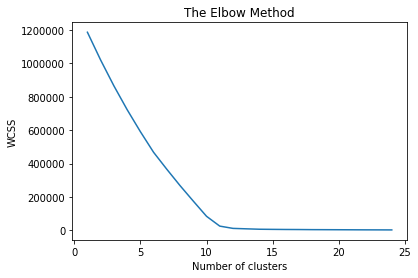

In [301]:
plt.plot(range(1, max_elbow), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [302]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

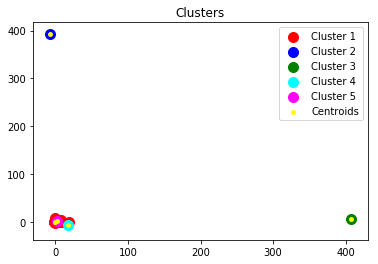

In [289]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 15, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
#plt.xlim(-2, 40)
#plt.ylim(-2, 20)
plt.legend()
plt.show()

# Training the model (Hierarchical Clustering)

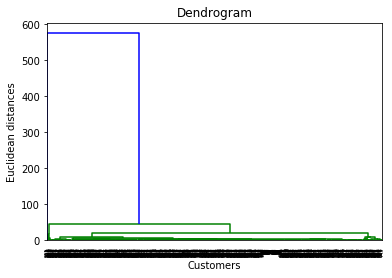

In [291]:
dendrogram = sch.dendrogram(sch.linkage(Xs, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [115]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

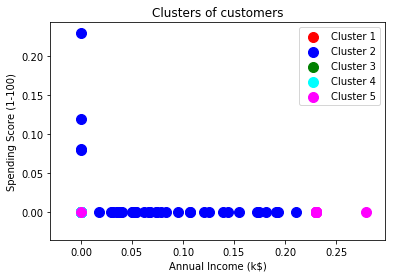

In [116]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()